# Limpeza de Dados para Análise de Séries Temporais

## Objetivos:
- Limpar e preparar os dados para análise de séries temporais.


In [54]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt


In [55]:
# Carregar o ficheiro CSV original num DataFrame
caminho_ficheiro = '../data/raw/births_PT.csv'
df = pd.read_csv(caminho_ficheiro)

df.head(13)


,PopName,Area,Year,YearReg,Month,Vital,Births,Access,Note1,Note2,Note3,RefCode,LDB
0,PRT,1,1901,.,1,1,15178,O,.,.,.,1,1
1,PRT,1,1901,.,2,1,15826,O,.,.,.,1,1
2,PRT,1,1901,.,3,1,14132,O,.,.,.,1,1
3,PRT,1,1901,.,4,1,16179,O,.,.,.,1,1
4,PRT,1,1901,.,5,1,15070,O,.,.,.,1,1
5,PRT,1,1901,.,6,1,12881,O,.,.,.,1,1
6,PRT,1,1901,.,7,1,12047,O,.,.,.,1,1
7,PRT,1,1901,.,8,1,13922,O,.,.,.,1,1
8,PRT,1,1901,.,9,1,13226,O,.,.,.,1,1
9,PRT,1,1901,.,10,1,13918,O,.,.,.,1,1


In [56]:
# Filtrar linhas onde o valor da coluna 'Month' não é numérico
df = df[df['Month'].apply(lambda x: x.isnumeric())]

# Converter 'Year' e 'Month' para o tipo de dados string
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)

# Criar uma nova coluna 'Date' combinando 'Year' e 'Month'
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-01')

# Definir 'Date' como o índice do DataFrame
df.set_index('Date', inplace=True)

# Eliminar colunas irrelevantes
colunas_a_eliminar = ['PopName', 'Area', 'Year', 'YearReg', 'Month', 'Vital', 'Access', 'Note1', 'Note2', 'Note3', 'RefCode', 'LDB']
df_limpo = df.drop(columns=colunas_a_eliminar)

df_limpo.head(13)


,Births
Date,
1901-01-01,15178
1901-02-01,15826
1901-03-01,14132
1901-04-01,16179
1901-05-01,15070
1901-06-01,12881
1901-07-01,12047
1901-08-01,13922
1901-09-01,13226


#### Completar a informação dos anos em falta

1. Identificar o intervalo de anos presente no conjunto de dados original.
2. Criar uma lista completa de todos os meses dentro desse intervalo de anos.
3. Combinar essa lista com o conjunto de dados original.
4. Utilizar interpolação linear para preencher quaisquer valores em falta.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


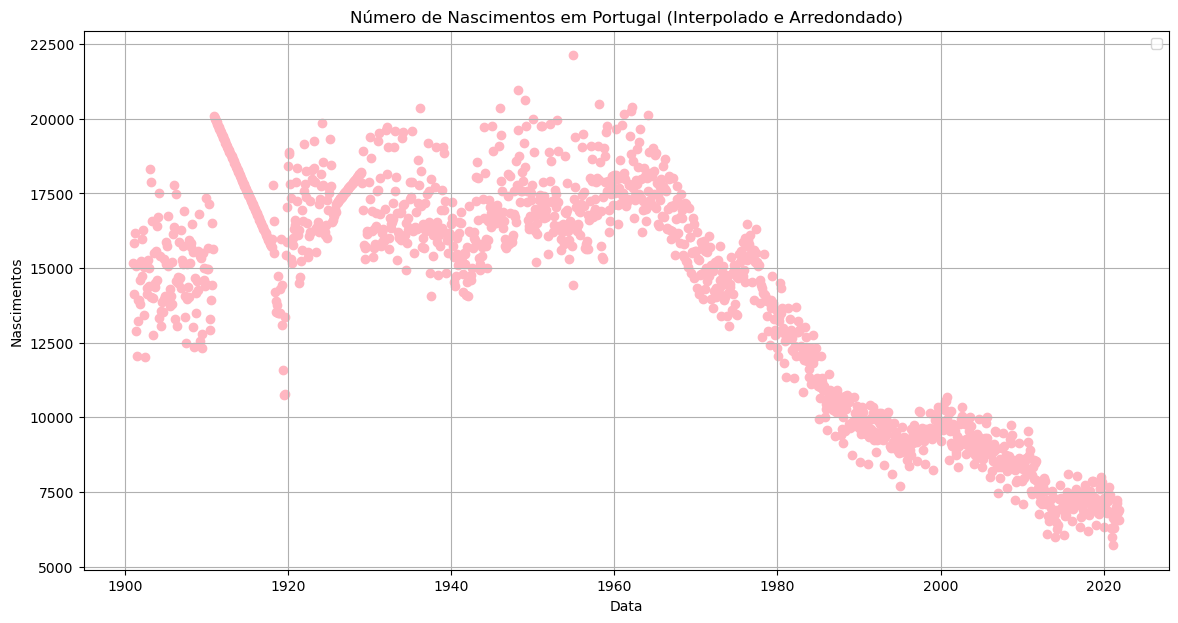

In [62]:
# Identificar o intervalo de anos no conjunto de dados
ano_minimo = df['Year'].min()
ano_maximo = df['Year'].max()

# Criar uma lista completa de todos os meses para todos os anos
todos_os_meses = pd.date_range(start=f"{ano_minimo}-01-01", end=f"{ano_maximo}-12-01", freq='MS')

# Criar um novo DataFrame que inclui todos os meses
df_completo = pd.DataFrame(todos_os_meses, columns=['Date'])
df_completo.set_index('Date', inplace=True)

# Combinar a lista completa de meses com o DataFrame original
df_combinado = pd.merge(df_completo, df_limpo, left_index=True, right_index=True, how='left')

# Realizar interpolação linear para preencher os valores em falta
df_combinado_interpolado = df_combinado.interpolate(method='linear').round()

df_combinado_interpolado.head(13)

plt.figure(figsize=(14, 7))
plt.scatter(df_combinado_interpolado.index, df_combinado_interpolado['Births'], color='#FFB6C1', marker='o')
plt.title('Número de Nascimentos em Portugal (Interpolado e Arredondado)')
plt.xlabel('Data')
plt.ylabel('Nascimentos')
plt.legend()
plt.grid(True)
plt.show()



## Conclusão

Os dados estão agora limpos e prontos para continuar a análise.


In [63]:
# Salvar o DataFrame limpo num novo ficheiro CSV
df_limpo.to_csv("../data/processed/births_PT_limpo.csv", index=True)